In [63]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [100]:
class Individual:
    def __init__(self, w, p, alpha, behaviour):
        self.W = w #wealth
        self.P = p #chance of having bad event happening
        self.alpha = alpha #fraction lost during bad event
        self.behaviour = behaviour #[Treshold,contribution when Cr<=Threshold,contribution when Cr>tThreshold]
        self.round = 0
        self.history= [w]
        self.contribution = []
        self.total = 0
        
    def Contribution(self, Cr):
        beh= self.behaviour[self.round]
        if(Cr<=beh[0]):
            return beh[1]
        else:
            return beh[2]
        
    def Risk(self, Cr):#chance of having bad event happening
        lmda = 1
        w0 = self.total
        p = lambda Cr, w0, lmda : 1-Cr/w0*lmda
        #p = lambda Cr, w0, lmda : 1-math.pow((Cr/w0),lmda)
        #p = lambda Cr, w0, lmda : 1/(math.exp(lmda*((Cr/w0)-0.5))+1)
        if (random.random() < p(Cr, w0, lmda)):
            return 1
        return 0
    
    def Step(self, Cr):
        #amount contributed to public good
        c = self.Contribution(Cr)
        self.contribution.append(c)
        #calculate what's left of wealth
        self.W = (1-self.alpha*self.Risk(Cr))*(self.W-c)
        self.history.append(self.W)
        self.round +=1
        print("Wealth" ,self.W,"contribution", c)
        return c

In [101]:
def CreatePopulation(Number):
    res = []
    for i in range(Number):
        #parameters for individual
        W = 1
        P = 0.5
        alpha = 0.1
        beh = [[0.0,0.1,0.0], [0.2,0.1,0.5]]#what we want to learn
        #create individual
        p = Individual(W,P,alpha,beh)
        res.append(p)
    return res

>>>>Round :  1 <<<<<
Wealth 0.81 contribution 0.1
Wealth 0.45 contribution 0.5
>>>>Cr :  0.6 
>>>>Round :  2 <<<<<
Wealth 0.2790000000000001 contribution 0.5
Wealth 0.225 contribution 0.2
>>>>Cr :  1.2999999999999998 


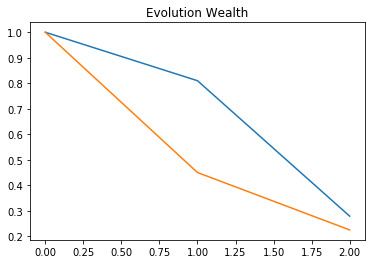

In [102]:
rounds = 2 # amount of rounds
Cr = 0 # initial public good 
population = CreatePopulation(2) # population of players
population[1].behaviour = [[0.1,0.5,0.1],[0.7,0.2,0.5]]
temp = 0
for p in population:
        temp += p.W
for p in population:
        p.total = temp*len(population)

for i in range(rounds):
    temp=0
    print(">>>>Round : ", i+1, "<<<<<")
    for p in population:
        temp += p.Step(Cr)
    Cr+=temp
    print(">>>>Cr : ", Cr, "")
    
    
plt.title('Evolution Wealth')
for p in population:
    plt.plot(p.history)

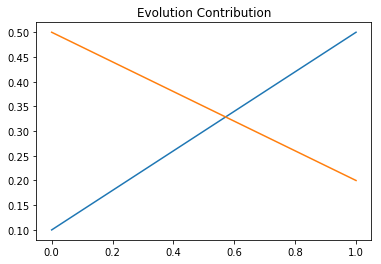

In [40]:
plt.title('Evolution Contribution')
for p in population:
    plt.plot(p.contribution)

Text(0.5,1,'probabilty distributions')

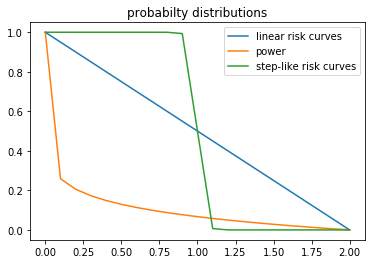

In [103]:
w0 = 2
p3 = lambda Cr, w0, lmda : 1/(math.exp(lmda*((Cr/w0)-0.5))+1)
p1 = lambda Cr, w0, lmda : 1-(Cr/w0*lmda)
p2 = lambda Cr, w0, lmda : 1-math.pow((Cr/w0),lmda)
xas = np.arange(0.0, 2.1, 0.1)
yas = [ p1(x, w0, 1) for x in xas ]
yas2 = [ p2(x, w0, 0.1) for x in xas ]
yas3 = [ p3(x, w0, 100) for x in xas ]

plt.plot(xas, yas,label = 'linear risk curves')
plt.plot(xas, yas2,label='power')
plt.plot(xas, yas3, label = 'step-like risk curves')
plt.legend()
plt.title('probabilty distributions')